/Users/aaayush/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/m5/snsrmpyn36q83rw1hrlnts640000gn/T/ipykernel_80860/4102831866.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Completed EOCs', y='Cohen Clinic', data=df_cumulative_sorted_eocs, ci=None)


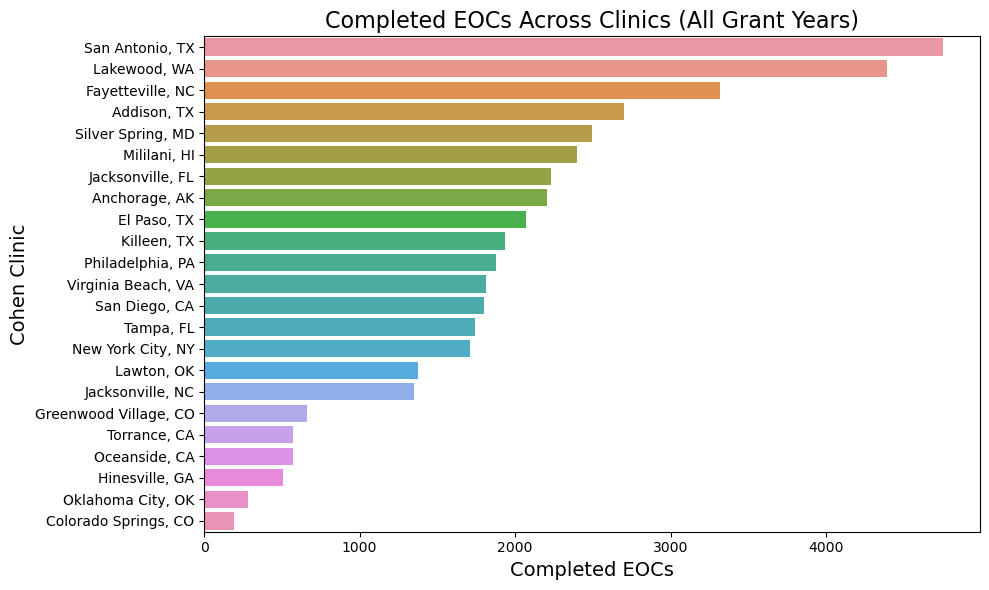

/var/folders/m5/snsrmpyn36q83rw1hrlnts640000gn/T/ipykernel_80860/4102831866.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='# Total Staff', y='Cohen Clinic', data=df_cumulative_sorted_staff, ci=None)


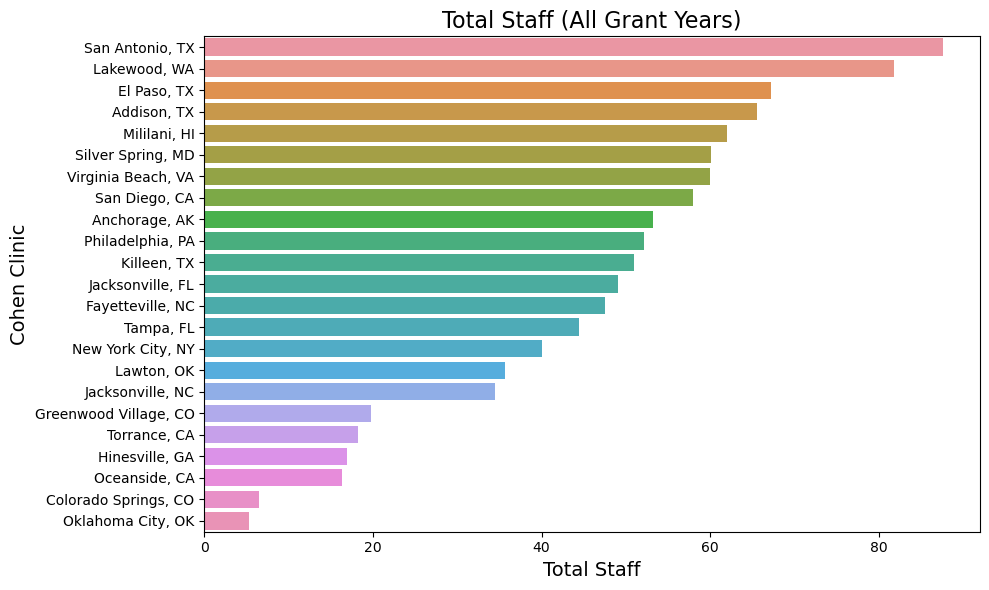

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided Excel file
file_path = 'Staffing Ratio.xlsx'
df = pd.read_excel(file_path, sheet_name='Staffing Ratio - 2021+')

# Clean the data by removing any NaN values and 'AVERAGES' row
df_clean = df.dropna(subset=['Cohen Clinic'])
df_clean = df_clean[df_clean['Cohen Clinic'] != 'AVERAGES']

# Remove Clarksville, TN from the dataset
df_clean = df_clean[df_clean['Cohen Clinic'] != 'Clarksville, TN']

# Cumulative sum for Total Staff and Completed EOCs
df_cumulative = df_clean.groupby('Cohen Clinic').agg({
    '# Total Staff': 'sum',
    'Completed EOCs': 'sum'
}).reset_index()

# Sort by Completed EOCs in descending order
df_cumulative_sorted_eocs = df_cumulative.sort_values(by='Completed EOCs', ascending=False)

title_fontsize = 16
label_fontsize = 14

# Bar plot for Completed EOCs across clinics, sorted in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='Completed EOCs', y='Cohen Clinic', data=df_cumulative_sorted_eocs, ci=None)
plt.title('Completed EOCs Across Clinics (All Grant Years)', fontsize=title_fontsize)
plt.xlabel('Completed EOCs', fontsize=label_fontsize)
plt.ylabel('Cohen Clinic', fontsize=label_fontsize)
plt.tight_layout()
plt.show()

# Sort by Total Staff in descending order
df_cumulative_sorted_staff = df_cumulative.sort_values(by='# Total Staff', ascending=False)

# Bar plot for Total Staff across clinics, sorted in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='# Total Staff', y='Cohen Clinic', data=df_cumulative_sorted_staff, ci=None)
plt.title('Total Staff (All Grant Years)', fontsize=title_fontsize)
plt.xlabel('Total Staff', fontsize=label_fontsize)
plt.ylabel('Cohen Clinic', fontsize=label_fontsize)
plt.tight_layout()
plt.show()

/Users/aaayush/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aaayush/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


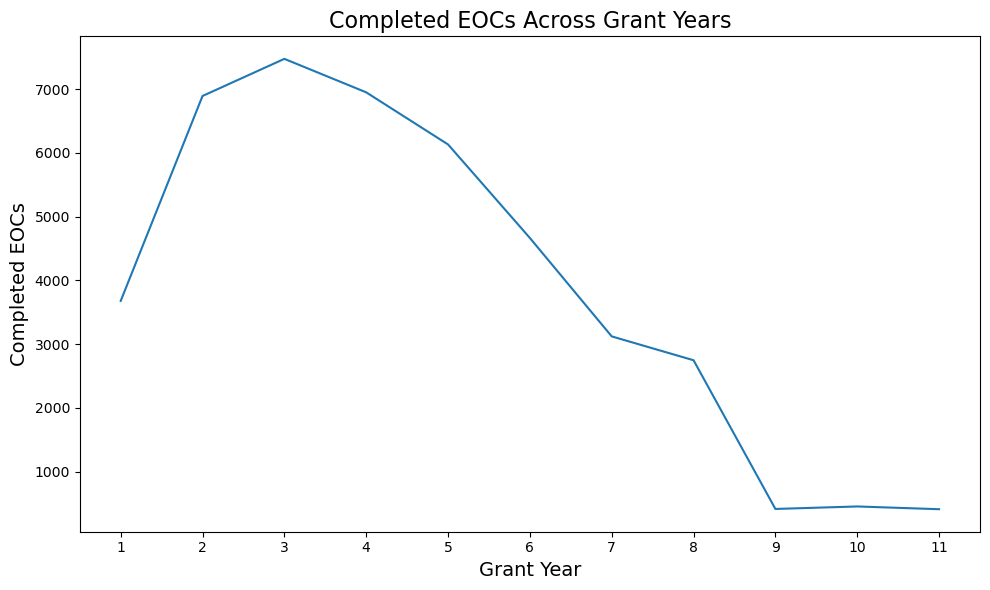

/Users/aaayush/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aaayush/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


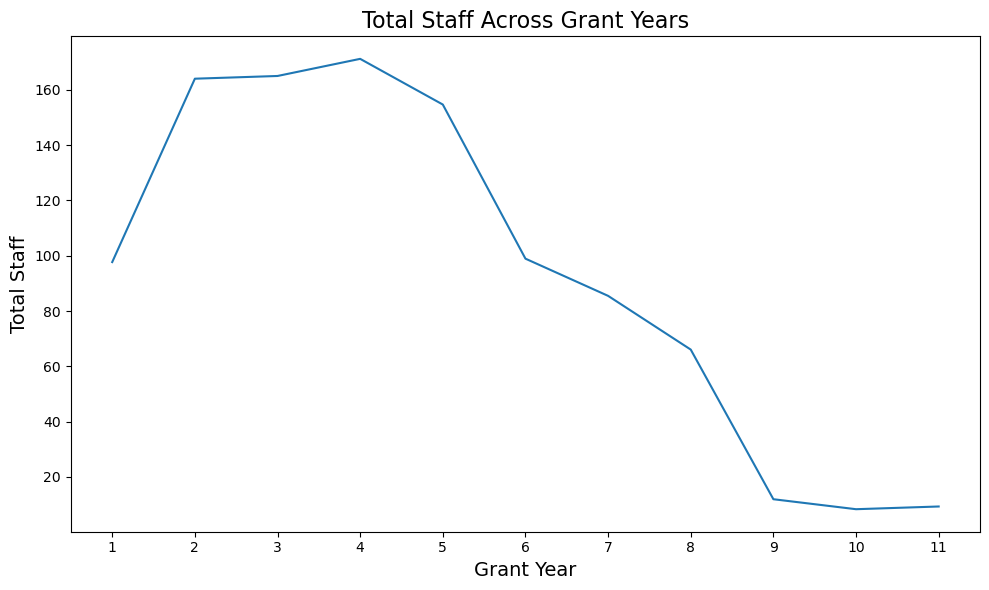

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summing relevant columns for each year for '# Total Staff' and 'Completed EOCs'
df_yearly_sum = df_clean.groupby('Grant Year').agg({
    'Completed EOCs': 'sum',
    '# Total Staff': 'sum'
}).reset_index()

# Define font sizes
title_fontsize = 16
label_fontsize = 14

# Line chart for the cumulative sum of Completed EOCs across the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Grant Year', y='Completed EOCs', data=df_yearly_sum)
plt.title('Completed EOCs Across Grant Years', fontsize=title_fontsize)
plt.xlabel('Grant Year', fontsize=label_fontsize)
plt.ylabel('Completed EOCs', fontsize=label_fontsize)
plt.xticks(df_yearly_sum['Grant Year'])
plt.tight_layout()
plt.show()

# Line chart for the cumulative sum of Total Staff across the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Grant Year', y='# Total Staff', data=df_yearly_sum)
plt.title('Total Staff Across Grant Years', fontsize=title_fontsize)
plt.xlabel('Grant Year', fontsize=label_fontsize)
plt.ylabel('Total Staff', fontsize=label_fontsize)
plt.xticks(df_yearly_sum['Grant Year'])
plt.tight_layout()
plt.show()
